In [ ]:
import riskfolio as rp
import matplotlib.pyplot as plt
import pandas as pd


import pandas as pd
import cryptpandas as crp



import warnings
warnings.filterwarnings("ignore")


asset_classes = pd.read_csv("asset_classes.csv").sort_values(by = ["Assets"])
asset_classes = asset_classes.sort_values(by=['Assets'])

assets = list(asset_classes["Assets"])


data = crp.read_encrypted(path='data_releases/release_4763.crypt', password='YaYVHkUbVZkzNItu')
print(data)


       strat_0   strat_1   strat_2   strat_3    strat_4    strat_5   strat_6  \
0          NaN       NaN       NaN       NaN        NaN        NaN       NaN   
1    -1.045104       NaN       NaN       NaN        NaN  10.139780  1.481773   
2    -0.229267       NaN       NaN       NaN        NaN  10.109780  0.731916   
3    -0.332475       NaN -0.056052       NaN        NaN   9.961956 -0.557418   
4    -0.827446       NaN -0.349031       NaN        NaN   9.964834 -1.177777   
...        ...       ...       ...       ...        ...        ...       ...   
4631 -1.266879  0.686188  0.130676 -0.550758   7.878856   9.627914 -1.057427   
4632  1.174839 -1.160249 -0.449200  0.316505  10.749818  10.819165 -1.165488   
4633  1.701566 -2.672398  0.300283 -0.439482  12.226938  12.006430 -2.531393   
4634  0.653894  0.259393 -0.616632 -0.209166   9.726623  10.525841 -1.077109   
4635 -3.336885  1.668953 -1.337712 -0.684874   8.798159   8.534083 -1.245784   

       strat_7   strat_8   strat_9  ...

In [69]:
constraints = pd.read_csv("constraints.csv")
constraints


,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Each asset in a class,Class 1,Strat,<=,0.1,NaN,NaN,NaN,NaN


In [70]:
import numpy as np

returns = data.pct_change().dropna()
returns

returns = returns.replace([np.inf, -np.inf], np.nan).dropna()




# Variables

In [71]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MDD'
obj = 'Sharpe'
rf = 0
l  = 0

"""
’MV’: Standard Deviation.
’MAD’: Mean Absolute Deviation.
’MSV’: Semi Standard Deviation.
’FLPM’: First Lower Partial Moment (Omega Ratio).
’SLPM’: Second Lower Partial Moment (Sortino Ratio).
’CVaR’: Conditional Value at Risk.
’EVaR’: Entropic Value at Risk.
’WR’: Worst Realization (Minimax)
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
’ADD’: Average Drawdown of uncompounded cumulative returns.
’DaR’: Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.
’UCI’: Ulcer Index of uncompounded cumulative returns.
"""

'\n’MV’: Standard Deviation.\n’MAD’: Mean Absolute Deviation.\n’MSV’: Semi Standard Deviation.\n’FLPM’: First Lower Partial Moment (Omega Ratio).\n’SLPM’: Second Lower Partial Moment (Sortino Ratio).\n’CVaR’: Conditional Value at Risk.\n’EVaR’: Entropic Value at Risk.\n’WR’: Worst Realization (Minimax)\n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).\n’ADD’: Average Drawdown of uncompounded cumulative returns.\n’DaR’: Drawdown at Risk of uncompounded cumulative returns.\n’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.\n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.\n’UCI’: Ulcer Index of uncompounded cumulative returns.\n'

# Optimize

In [76]:

A, B = rp.assets_constraints(constraints, asset_classes)

port = rp.Portfolio(returns = returns)

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

port.upperlng = 0.1  # Setting the upper limit for long positions

# Perform optimization
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)


In [77]:
w

,weights
strat_0,6.230534e-02
strat_1,4.900482e-02
strat_2,4.587496e-08
strat_3,1.260653e-07
strat_4,1.000037e-01
strat_5,1.000024e-01
strat_6,1.000002e-01
strat_7,3.031274e-08
strat_8,4.449045e-02
strat_9,1.629047e-08


# Plotting

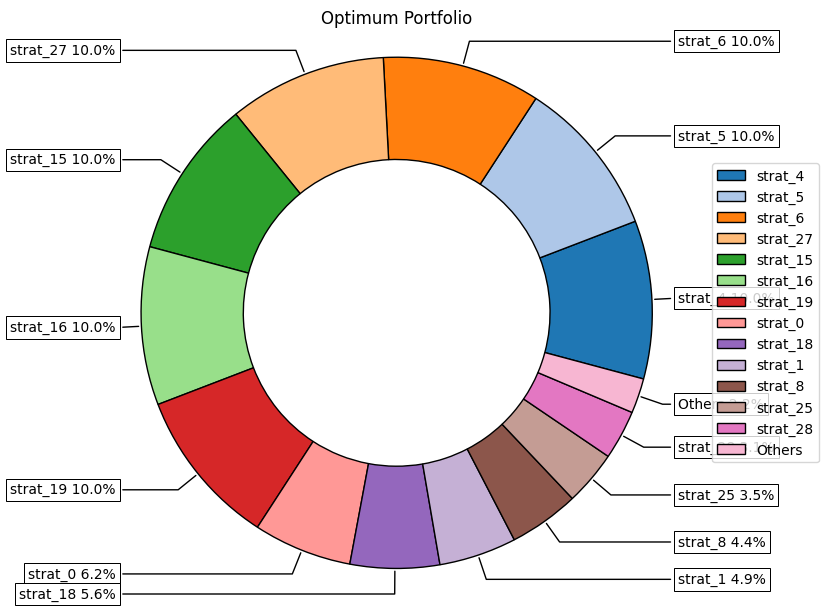

In [78]:
ax = rp.plot_pie(w=w, title = "Optimum Portfolio", others = 0.05, cmap = 'tab20')
plt.show()

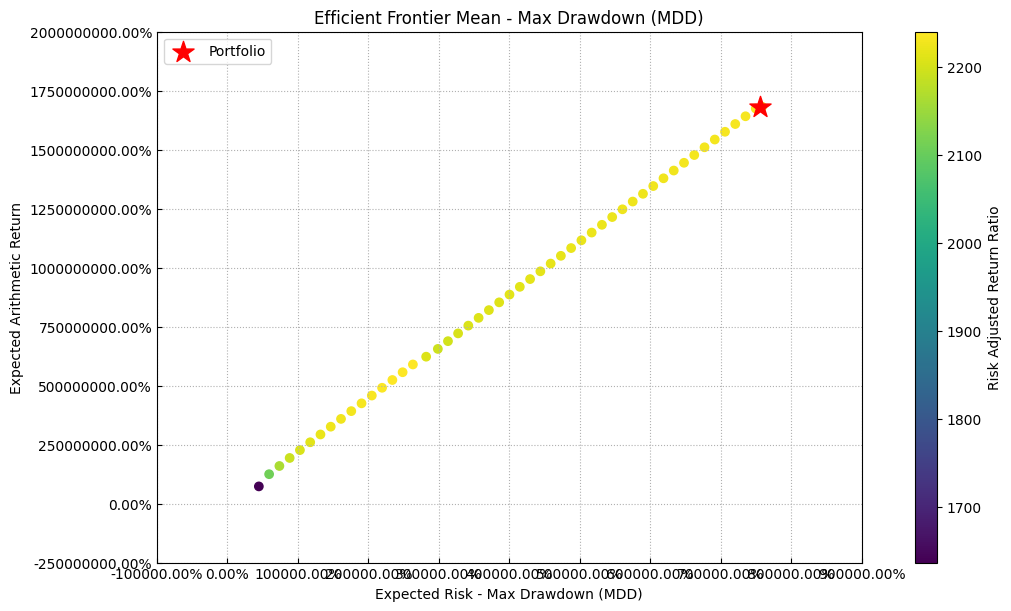

In [79]:
frontier = port.efficient_frontier(model = model, rm=rm, points=50, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov=port.cov, returns = returns, rm=rm,
                     rf=rf, cmap='viridis', w=w)
plt.show()

In [32]:
frontier


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
strat_0,1.856638e-09,1.787796e-13,4.529575e-13,4.560775e-13,3.283844e-13,6.667503e-13,2.920439e-12,7.585809e-12,4.336411e-11,2.680713e-12,...,1.527694e-10,2.967230e-11,2.647846e-11,2.006436e-10,2.831214e-10,8.293402e-11,7.609492e-11,2.466181e-11,2.157130e-10,2.058795e-11
strat_1,1.428628e-09,6.541195e-12,1.663270e-12,1.633621e-12,1.260358e-12,5.327821e-13,2.149692e-12,5.529271e-12,3.239587e-11,2.003943e-12,...,1.070025e-10,1.966879e-11,1.760005e-11,1.349587e-10,1.957238e-10,5.476000e-11,4.934934e-11,1.658718e-11,1.392597e-10,1.344287e-11
strat_2,2.313426e-02,1.515290e-11,3.746097e-12,3.665149e-12,2.836824e-12,1.163732e-12,4.748623e-12,1.222567e-11,7.229385e-11,4.452511e-12,...,2.735077e-10,5.017077e-11,4.488981e-11,3.445328e-10,4.991479e-10,1.399043e-10,1.296563e-10,4.365878e-11,3.667578e-10,4.088603e-11
strat_3,4.217227e-02,3.482869e-02,2.581226e-02,4.800366e-11,4.471024e-11,1.161037e-12,5.053613e-12,1.295971e-11,7.642966e-11,4.707389e-12,...,2.743034e-10,5.032089e-11,4.507682e-11,3.457519e-10,5.009066e-10,1.403575e-10,1.284217e-10,4.325117e-11,3.629791e-10,4.445101e-11
strat_4,4.127151e-09,2.141387e-11,5.420560e-12,5.321740e-12,4.104774e-12,1.763712e-12,7.146730e-12,1.838476e-11,1.077919e-10,6.661403e-12,...,3.663436e-10,6.730117e-11,6.018571e-11,4.619736e-10,6.693027e-10,1.874926e-10,1.706974e-10,5.739080e-11,4.820578e-10,6.104828e-11
strat_5,4.772849e-03,1.076584e-11,1.484591e-12,1.158419e-12,8.460517e-13,9.658595e-13,4.196528e-12,1.087217e-11,6.263562e-11,3.858745e-12,...,2.425126e-10,4.507535e-11,3.938078e-11,3.097896e-10,4.416620e-10,1.260967e-10,1.167299e-10,3.882361e-11,3.304913e-10,3.570712e-11
strat_6,1.792236e-09,8.509720e-12,2.154998e-12,2.090390e-12,1.606131e-12,6.627627e-13,2.738310e-12,6.768877e-12,3.979531e-11,2.472549e-12,...,1.444357e-10,2.754413e-11,2.317695e-11,1.895388e-10,2.667627e-10,7.725570e-11,7.260638e-11,2.390192e-11,2.056726e-10,1.924375e-11
strat_7,2.798310e-01,3.820505e-01,2.113743e-01,1.331088e-01,3.085642e-02,6.499198e-12,6.842861e-11,2.593130e-11,6.641049e-10,4.861534e-11,...,3.220363e-11,1.035309e-11,8.239050e-13,5.680930e-11,4.354686e-11,2.886009e-11,4.594617e-11,4.845467e-12,8.641448e-11,7.438458e-12
strat_8,2.708506e-02,1.815004e-11,4.435156e-12,4.264936e-12,3.278792e-12,1.502127e-12,6.237432e-12,1.594279e-11,9.337132e-11,5.765243e-12,...,3.570588e-10,6.690391e-11,5.672183e-11,4.599627e-10,6.452859e-10,1.876086e-10,1.717543e-10,5.637257e-11,4.869273e-10,6.136938e-11
strat_9,2.609766e-02,1.807813e-02,1.726192e-02,1.649827e-02,1.821596e-02,1.734372e-02,1.862098e-02,1.909993e-02,1.935912e-02,1.958392e-02,...,9.318577e-03,9.175820e-03,9.033064e-03,8.890311e-03,8.747557e-03,8.604799e-03,7.551413e-03,6.027708e-03,4.504004e-03,5.977367e-07


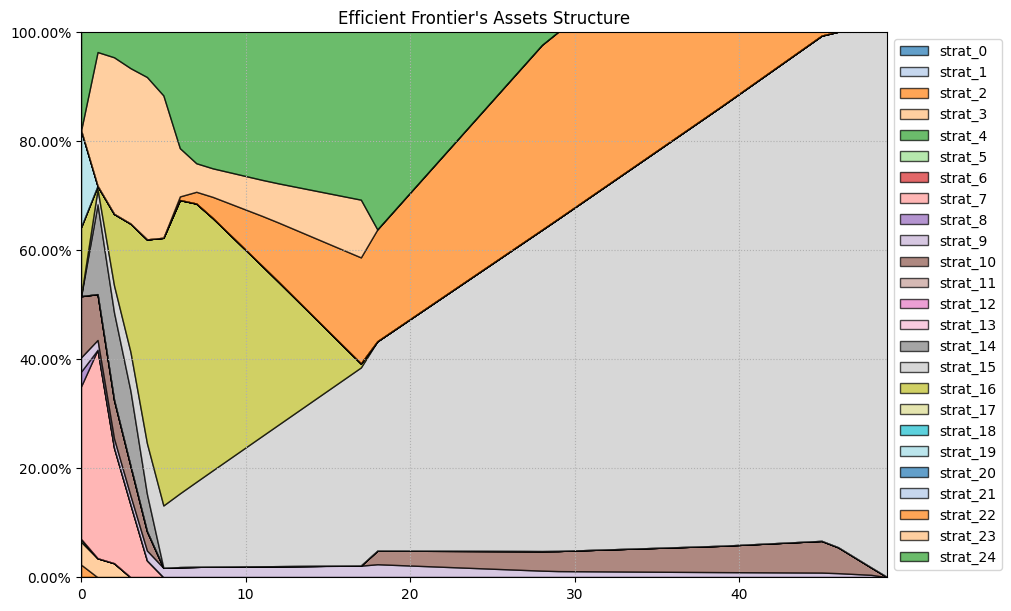

In [33]:
ax = rp.plot_frontier_area(w_frontier = frontier, cmap = "tab20")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'days'

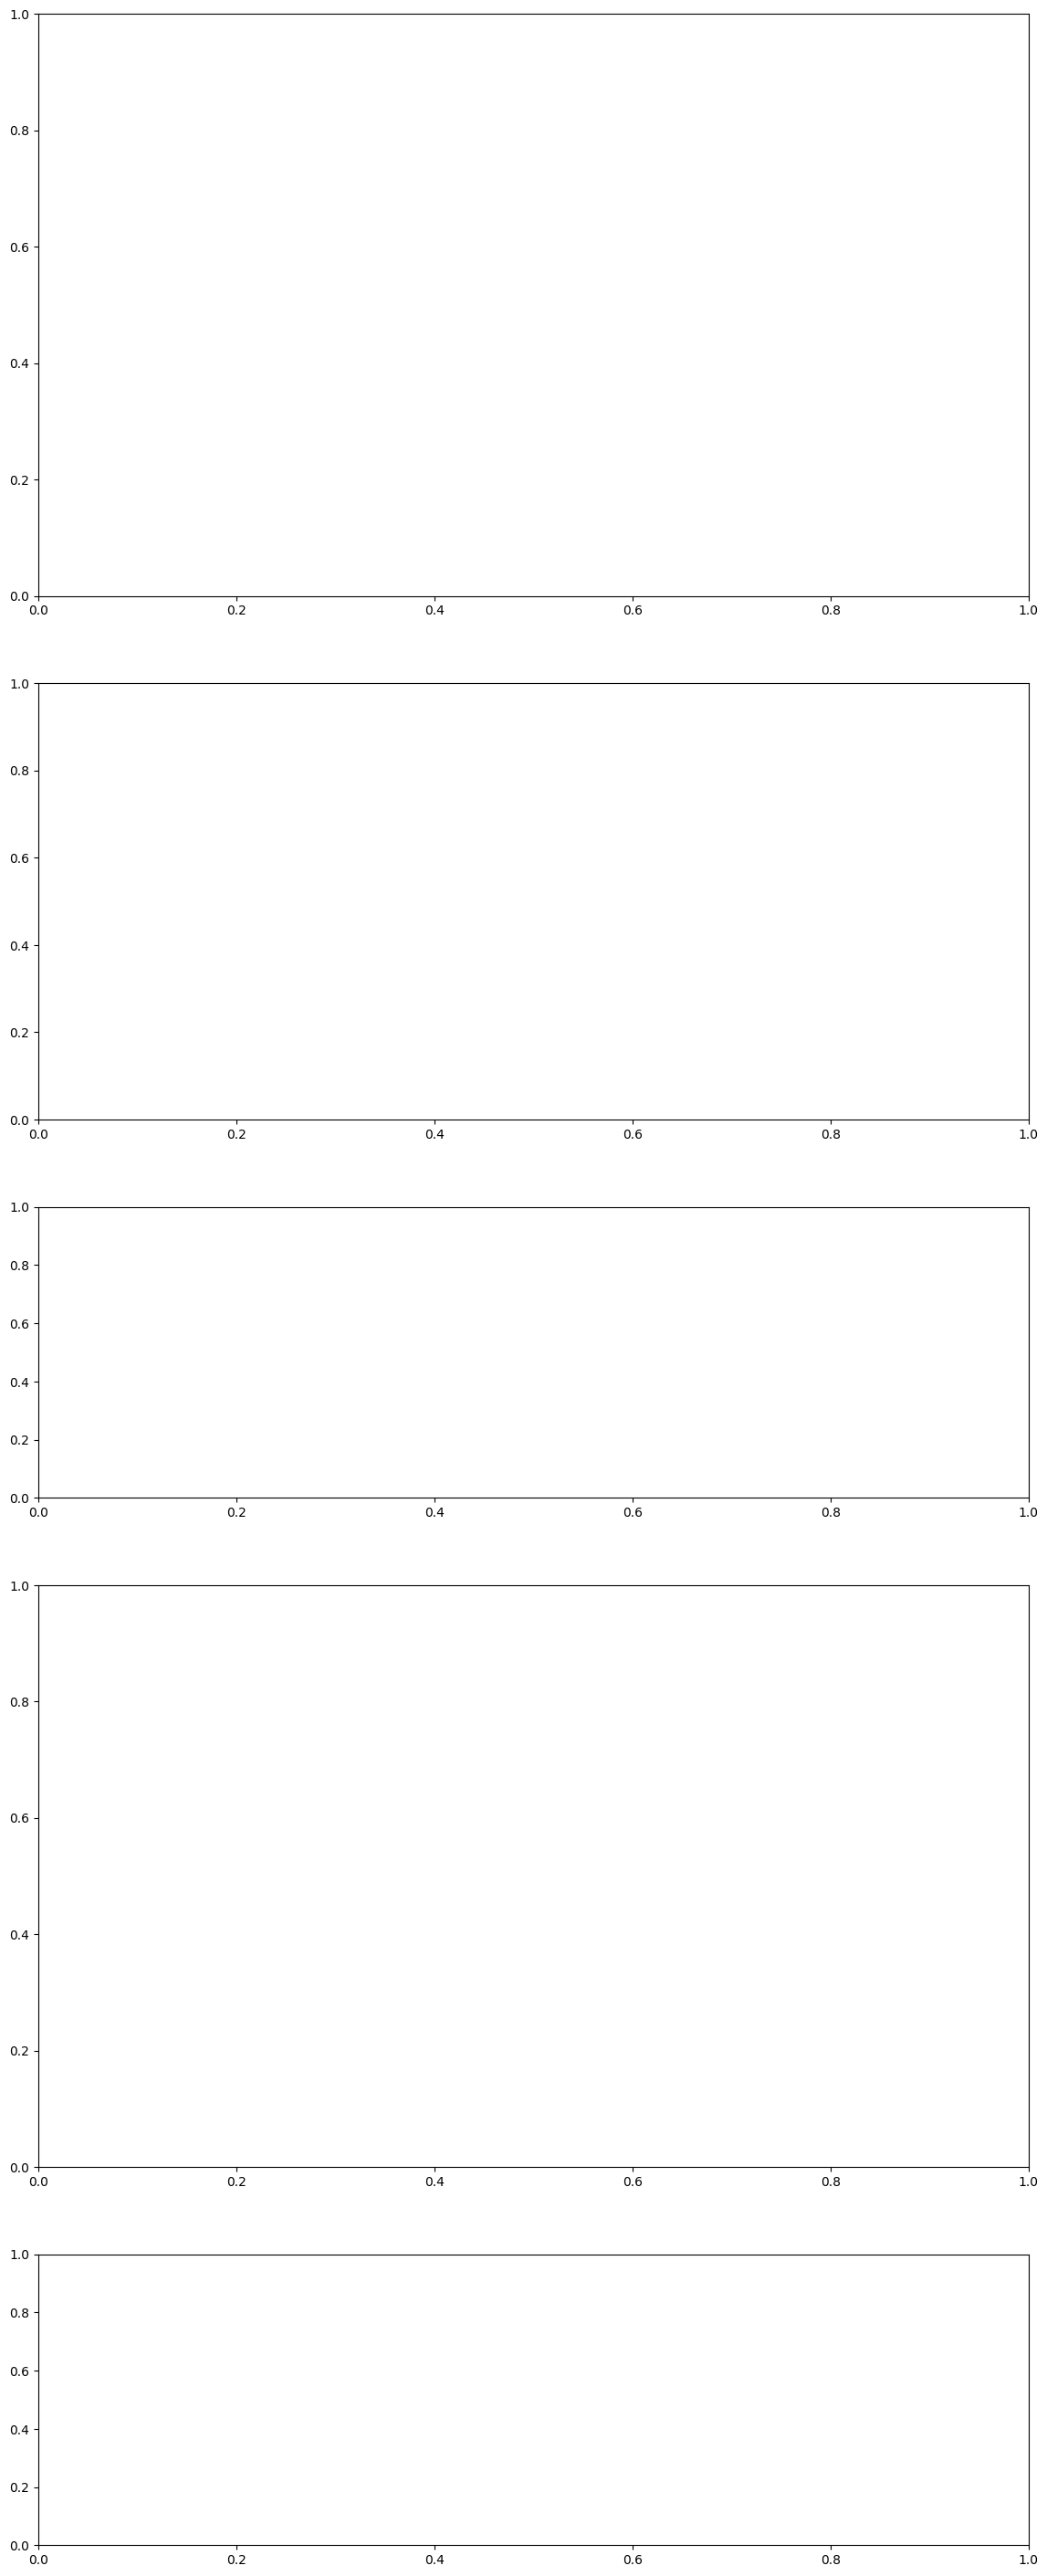

In [34]:
ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 365, days_per_year=365)
plt.show()